# Linear Reression

In [19]:
# Import libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

### Load data 

In [20]:
d = pd.read_csv(r"C:\Users\zakas\OneDrive\Documents\Supervised ML\Linear Regression\auto-mpg.csv")
d.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [21]:
d.shape

(398, 9)

### Create dummy variable

In [22]:
d['origin'] = d['origin'].replace({1: 'america', 2:'europe', 3:'assia'})

In [23]:
d.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,america,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,america,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,america,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,america,chevy s-10


In [26]:
print(d.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')


### dealine with missing values 

In [29]:
d.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
origin          0
dtype: int64

In [30]:
d.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
origin           object
dtype: object

In [32]:
hpIsDigit=pd.DataFrame(d.horsepower.str.isdigit())

In [34]:
d[hpIsDigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
32,25.0,4,98.0,?,2046,19.0,america
126,21.0,6,200.0,?,2875,17.0,america
330,40.9,4,85.0,?,1835,17.3,europe
336,23.6,4,140.0,?,2905,14.3,america
354,34.5,4,100.0,?,2320,15.8,europe
374,23.0,4,151.0,?,3035,20.5,america


In [39]:
d=d.replace('?',np.nan)
d[hpIsDigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
32,25.0,4,98.0,NaN,2046,19.0,america
126,21.0,6,200.0,NaN,2875,17.0,america
330,40.9,4,85.0,NaN,1835,17.3,europe
336,23.6,4,140.0,NaN,2905,14.3,america
354,34.5,4,100.0,NaN,2320,15.8,europe
374,23.0,4,151.0,NaN,3035,20.5,america


In [40]:
d.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
origin          0
dtype: int64

In [41]:
d[hpIsDigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
32,25.0,4,98.0,NaN,2046,19.0,america
126,21.0,6,200.0,NaN,2875,17.0,america
330,40.9,4,85.0,NaN,1835,17.3,europe
336,23.6,4,140.0,NaN,2905,14.3,america
354,34.5,4,100.0,NaN,2320,15.8,europe
374,23.0,4,151.0,NaN,3035,20.5,america


### create a dummy variable contn

In [43]:
d = pd.get_dummies(d,['origin'])

ValueError: Length of 'prefix' (1) did not match the length of the columns being encoded (2).

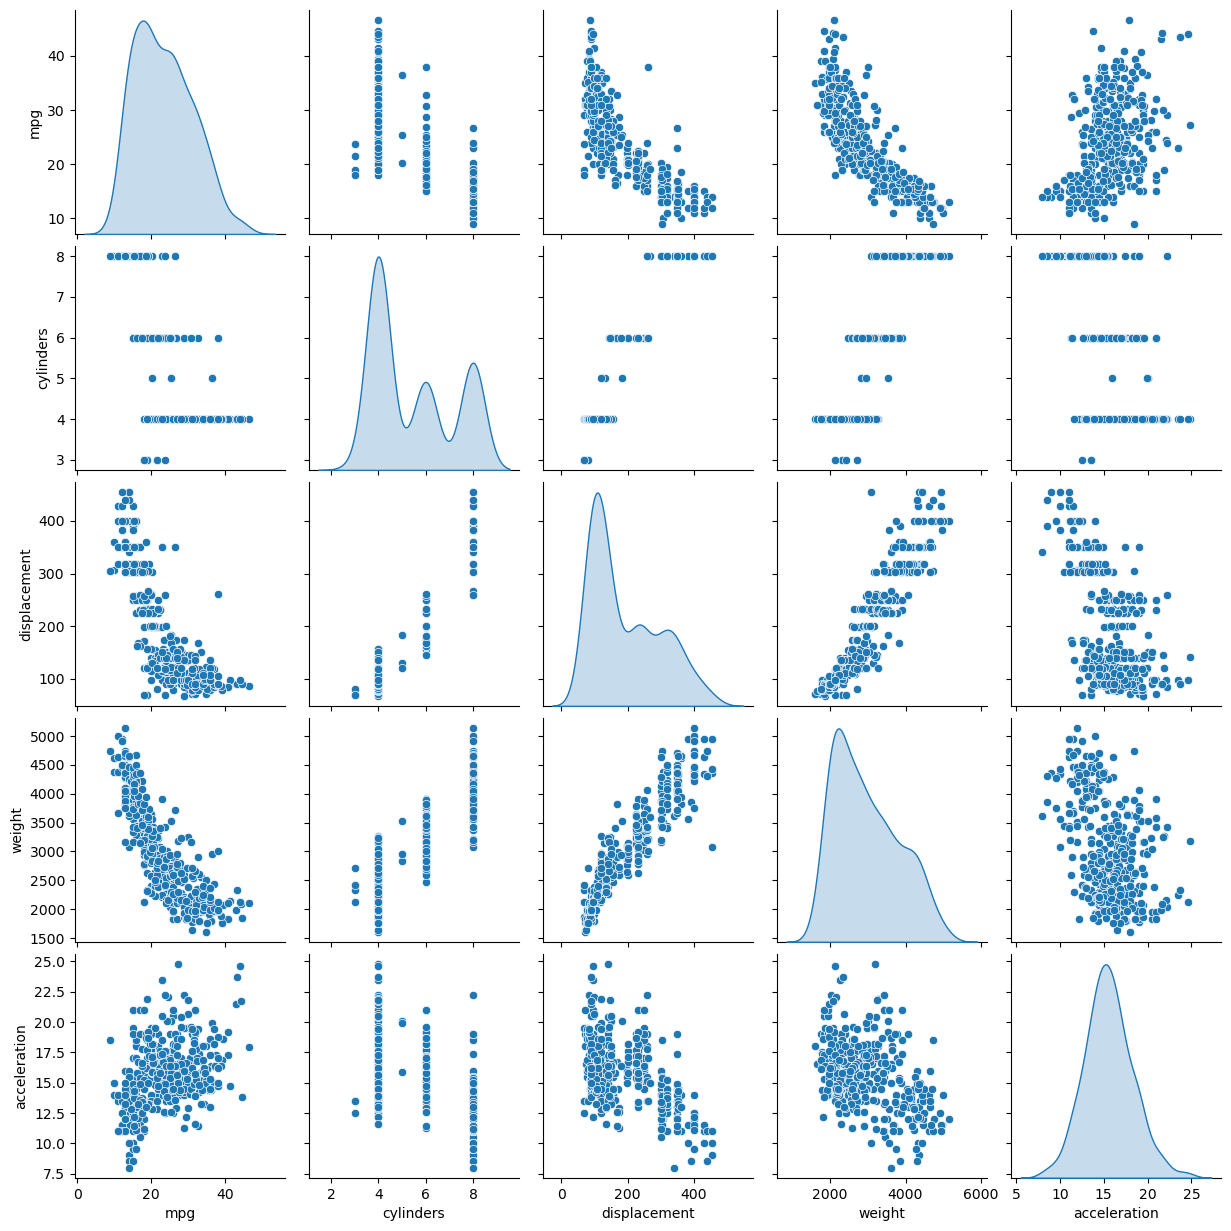

In [45]:
d_attr=d.iloc[:,0:7]
sns.pairplot(d_attr,diag_kind='kde')

# SPlit Data

In [46]:
d

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8,307.0,130,3504,12.0,america
1,15.0,8,350.0,165,3693,11.5,america
2,18.0,8,318.0,150,3436,11.0,america
3,16.0,8,304.0,150,3433,12.0,america
4,17.0,8,302.0,140,3449,10.5,america
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,america
394,44.0,4,97.0,52,2130,24.6,europe
395,32.0,4,135.0,84,2295,11.6,america
396,28.0,4,120.0,79,2625,18.6,america


In [47]:
y=d['mpg']
X=d.drop('mpg',axis=1)

In [49]:
X

,cylinders,displacement,horsepower,weight,acceleration,origin
0,8,307.0,130,3504,12.0,america
1,8,350.0,165,3693,11.5,america
2,8,318.0,150,3436,11.0,america
3,8,304.0,150,3433,12.0,america
4,8,302.0,140,3449,10.5,america
...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,america
394,4,97.0,52,2130,24.6,europe
395,4,135.0,84,2295,11.6,america
396,4,120.0,79,2625,18.6,america


In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)

In [53]:
regression_model=LinearRegression()
regression_model.fit(X_train,y_train)

ValueError: could not convert string to float: 'america'